In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
apps = pd.read_csv("datasets\apps.csv")
reviews = pd.read_csv("datasets\ user_reviews.csv")


In [11]:
apps.shape


(9659, 14)

In [12]:
apps.columns


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [13]:
apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [14]:
apps.describe()


,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [15]:
apps.isnull().sum().sort_values(ascending=False)


Rating            1463
Size              1227
Current Ver          8
Android Ver          2
App                  0
Unnamed: 0           0
Reviews              0
Category             0
Installs             0
Type                 0
Content Rating       0
Price                0
Last Updated         0
Genres               0
dtype: int64

In [16]:
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)


In [17]:
apps['Size'].value_counts().head()


Size
11.0    182
12.0    181
14.0    177
13.0    177
15.0    163
Name: count, dtype: int64

In [18]:
apps['Size'] = apps['Size'].replace('Varies with device', None)
apps['Size'] = apps['Size'].astype(float)


In [19]:
apps['Size'].fillna(apps['Size'].median(), inplace=True)


In [20]:
apps.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)


In [21]:
apps.isnull().sum()


Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
apps.duplicated().sum()


np.int64(0)

In [23]:
apps = apps.drop_duplicates()


In [24]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = apps['Installs'].astype(int)


In [26]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=True)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


In [27]:
apps['Price'].fillna(0, inplace=True)


In [28]:
apps['Price'].dtype


dtype('float64')

In [29]:
apps['Price'].head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [30]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=True)
apps['Price'] = apps['Price'].astype(float)


AttributeError: Can only use .str accessor with string values!

In [32]:
apps['Rating'] = apps['Rating'].fillna(apps['Rating'].mean())


In [33]:
apps.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9649 non-null   int64  
 1   App             9649 non-null   object 
 2   Category        9649 non-null   object 
 3   Rating          9649 non-null   float64
 4   Reviews         9649 non-null   int64  
 5   Size            9649 non-null   float64
 6   Installs        9649 non-null   int64  
 7   Type            9649 non-null   object 
 8   Price           9649 non-null   float64
 9   Content Rating  9649 non-null   object 
 10  Genres          9649 non-null   object 
 11  Last Updated    9649 non-null   object 
 12  Current Ver     9649 non-null   object 
 13  Android Ver     9649 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


In [34]:
apps.isnull().sum()


Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Data cleaning involved handling missing values, removing duplicates, and converting string-based numeric columns into usable formats.

In [35]:
apps['Category'].value_counts().head(10)


Category
FAMILY             1829
GAME                959
TOOLS               825
BUSINESS            420
MEDICAL             395
PRODUCTIVITY        374
PERSONALIZATION     374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

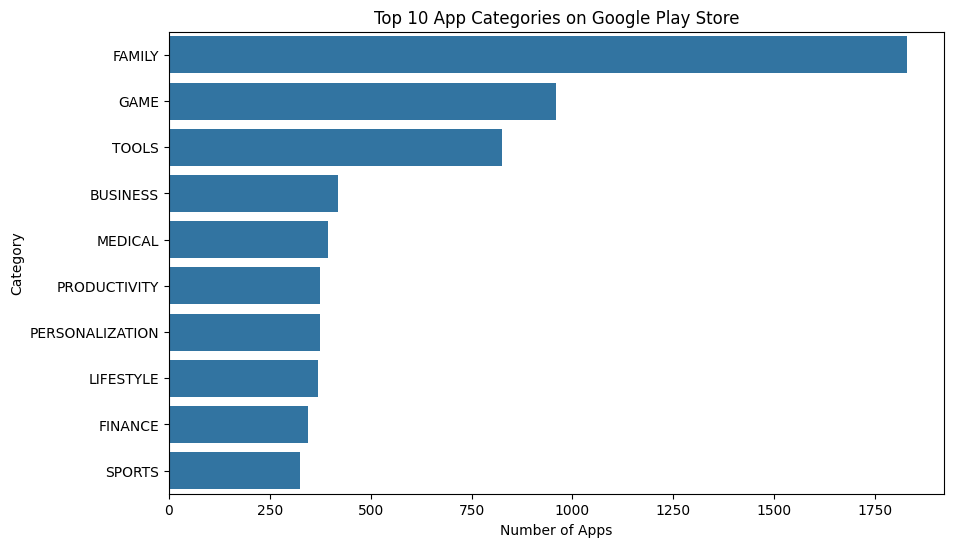

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(
    y='Category',
    data=apps,
    order=apps['Category'].value_counts().head(10).index
)
plt.title("Top 10 App Categories on Google Play Store")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


In [37]:
apps['Type'].value_counts()


Type
Free    8896
Paid     753
Name: count, dtype: int64

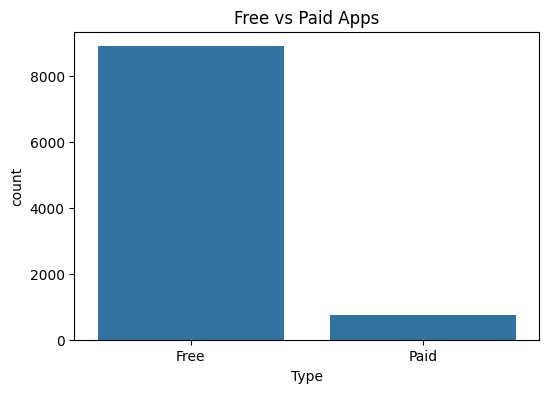

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=apps)
plt.title("Free vs Paid Apps")
plt.show()


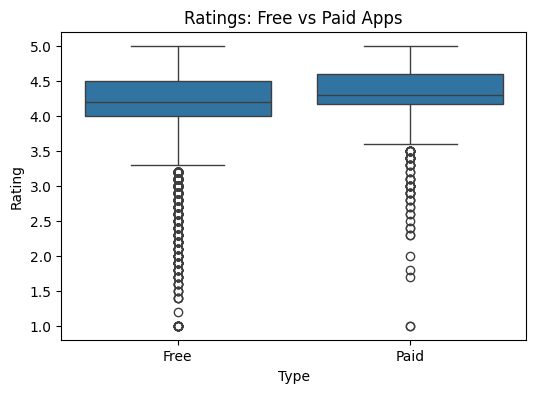

In [39]:
# Ratings: Free vs Paid
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title("Ratings: Free vs Paid Apps")
plt.show()


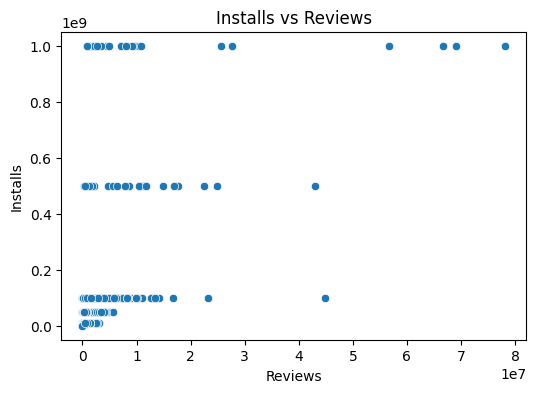

In [40]:
#Reviews vs Installs
plt.figure(figsize=(6,4))
sns.scatterplot(x='Reviews', y='Installs', data=apps)
plt.title("Installs vs Reviews")
plt.show()


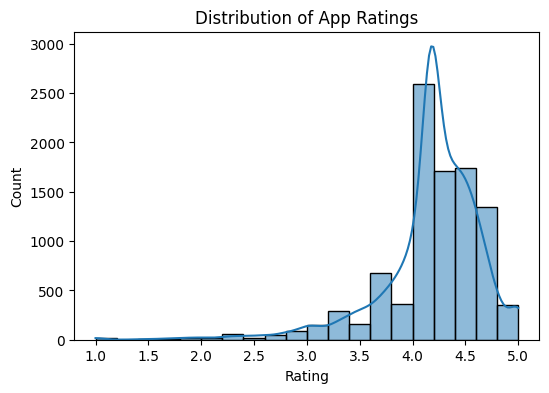

In [41]:
#Rating Distribution
plt.figure(figsize=(6,4))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()


Key Insights:
- Free apps dominate the Google Play Store
- Paid apps have slightly higher average ratings
- App category strongly affects popularity
- Higher reviews generally correlate with higher installs
- Most apps receive positive ratings
